# 1/14/2025 
# CERN Mass Prediction w/ Random Tree Regressor
## By David Macpherson



In [42]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# load data
data = pandas.read_csv('./dielectron.csv')


In [43]:
model = RandomForestRegressor(n_estimators=400, max_features="sqrt", max_depth=12, min_samples_split=2)
data.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99915.000000
mean,147935.327230,4.957212e+08,36.436466,0.135897,0.182291,-1.508037,14.412167,-0.064095,0.021614,-0.00548,44.002901,-0.003984,0.124654,-1.590559,13.802036,-0.072830,0.021385,-0.004220,30.019521
std,920.306064,4.037703e+08,41.216203,13.404976,13.470281,51.603652,12.388740,1.462137,1.799562,0.99999,46.751132,13.127404,13.168867,61.430040,12.460549,1.738033,1.817031,0.999996,25.255847
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.00000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023970e+08,8.458595,-5.233675,-5.276248,-15.859825,3.771172,-1.283883,-1.527030,-1.00000,11.055725,-4.794770,-4.605965,-22.036950,3.738103,-1.892287,-1.556925,-1.000000,12.445200
50%,147929.000000,3.902759e+08,21.717000,0.141339,0.099092,-0.312987,12.967800,-0.061178,0.034324,-1.00000,25.264600,-0.035638,0.083665,-0.690244,11.690950,-0.135911,0.026986,-1.000000,21.283100
75%,149011.000000,6.338891e+08,50.003350,5.714560,5.648087,13.212650,20.018925,1.144408,1.562355,1.00000,66.925525,4.819540,5.061860,19.005825,19.596400,1.768253,1.596737,1.000000,39.025050
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.00000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


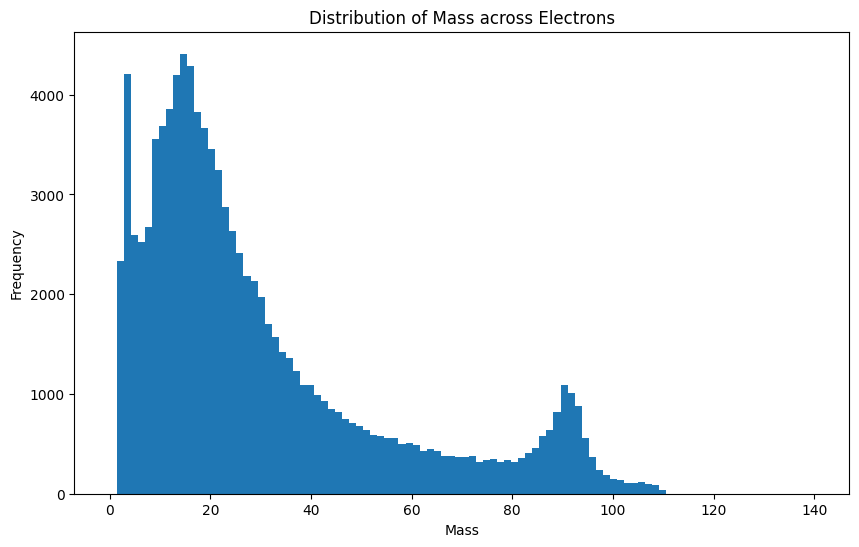

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(data['M'], bins=100, range=(0,140))
plt.title("Distribution of Mass across Electrons")
plt.xlabel("Mass")
plt.ylabel("Frequency")
plt.show()

In [45]:
## fill in censored data with mean
data["M"].fillna(data['M'].mean(), inplace=True)
## drop duplicates
data = data.drop_duplicates()

/tmp/ipykernel_44061/1097537509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["M"].fillna(data['M'].mean(), inplace=True)


In [46]:
# Feature and target separation
X = data.drop(columns='M',axis=1)
y = data['M']

# Training and Testing data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, max_features='sqrt', n_estimators=400)

/tmp/ipykernel_44061/3304620328.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


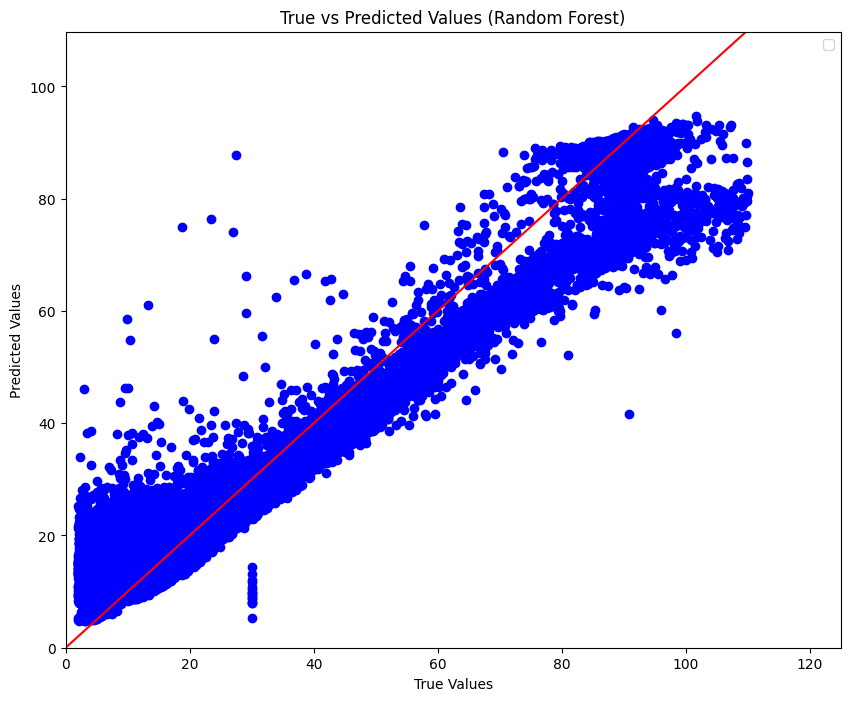

In [48]:


# Plotting
plt.figure(figsize=(10, 8))
test = model.predict(X_test)
plt.scatter(y_test, test, color='blue')

## set x and y bounds to the min and max of the data
plt.xlim(0, data['M'].max()+15)
plt.ylim(0, test.max()+15)


## plot line y = x on it
plt.plot([0, data['M'].max()+15], [0, data['M'].max()+15], color='red')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Random Forest)')
plt.legend()
plt.show()



In [ ]:
# Perform cross-validation on the best estimator
cv_scores_rf = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Report cross-validation results
print(f"Cross-Validation R² Scores (Random Forest): {cv_scores_rf}")
print(f"Mean R² Score (Random Forest): {cv_scores_rf.mean():.4f}")
print(f"Standard Deviation of R² Scores (Random Forest): {cv_scores_rf.std():.4f}")